# Scenario Analysis

This Jupyter notebook (Python 3 kernel) assesses GEOCLIM output for the various scenarios explored in this study.

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# additional imports
from tqdm.notebook import tqdm
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Read in Files

In [2]:
# read in the files
path = '/Volumes/GEOCLIM/modern_scenario_outputs/'

control_nc = Dataset(path+'ctrl_forward.nc')

noIA_nc = Dataset(path+'noIA.nc')

redIA_nc = Dataset(path+'redIA.nc')
redIA10_nc = Dataset(path+'redIA10.nc')
redIA5_nc = Dataset(path+'redIA5.nc')

redIAsunda_nc = Dataset(path+'redIAsunda.nc')
redIAsunda10_nc = Dataset(path+'redIAsunda10.nc')
redIAsunda5_nc = Dataset(path+'redIAsunda5.nc')

redIAsundaGL_nc = Dataset(path+'redIAsundaGL.nc')
redIAsunda10GL_nc = Dataset(path+'redIAsunda10GL.nc')
redIAsunda5GL_nc = Dataset(path+'redIAsunda5GL.nc')

noDeccan_nc = Dataset(path+'noDeccan.nc')
noET_nc = Dataset(path+'noET.nc')
noTraps_nc = Dataset(path+'noTraps.nc')
noCRB_nc = Dataset(path+'noCRB.nc')

test_params = pd.read_csv('../Output/test_params.csv')

In [3]:
control_nc.variables.keys()

dict_keys(['lon', 'lat', 'lith', 'runs', 'area', 'lithology_fraction', 'atm_CO2_level', 'volcanic_degassing', 'temperature', 'runoff', 'slope', 'erosion', 'reg_thickness', 'weathering', 'x_p_surf'])

In [4]:
test_params.columns

Index(['ke', 'a', 'b', 'krp', 'Ea_rp', 'T0_rp', 'h0', 'kd', 'kw', 'Ea', 'T0',
       'sigma', 'CaMg_1', 'CaMg_2', 'CaMg_3', 'CaMg_4', 'CaMg_5', 'CaMg_6',
       'R2'],
      dtype='object')

Compile:

In [5]:
refresh = False

if refresh:

    compiled_df = test_params.copy()
    compiled_df['volcanic_degassing'] = control_nc.variables['volcanic_degassing'][:].data

    compiled_df['control_ppm'] = control_nc.variables['atm_CO2_level'][:].data

    compiled_df['noIA_ppm'] = noIA_nc.variables['atm_CO2_level'][:].data

    compiled_df['redIA_ppm'] = redIA_nc.variables['atm_CO2_level'][:].data
    compiled_df['redIA10_ppm'] = redIA10_nc.variables['atm_CO2_level'][:].data
    compiled_df['redIA5_ppm'] = redIA5_nc.variables['atm_CO2_level'][:].data

    compiled_df['redIAsunda_ppm'] = redIAsunda_nc.variables['atm_CO2_level'][:].data
    compiled_df['redIAsunda10_ppm'] = redIAsunda10_nc.variables['atm_CO2_level'][:].data
    compiled_df['redIAsunda5_ppm'] = redIAsunda5_nc.variables['atm_CO2_level'][:].data

    compiled_df['redIAsundaGL_ppm'] = redIAsundaGL_nc.variables['atm_CO2_level'][:].data
    compiled_df['redIAsunda10GL_ppm'] = redIAsunda10GL_nc.variables['atm_CO2_level'][:].data
    compiled_df['redIAsunda5GL_ppm'] = redIAsunda5GL_nc.variables['atm_CO2_level'][:].data

    compiled_df['noDeccan_ppm'] = noDeccan_nc.variables['atm_CO2_level'][:].data
    compiled_df['noET_ppm'] = noET_nc.variables['atm_CO2_level'][:].data
    compiled_df['noTraps_ppm'] = noTraps_nc.variables['atm_CO2_level'][:].data
    compiled_df['noCRB_ppm'] = noCRB_nc.variables['atm_CO2_level'][:].data
    
    compiled_df.to_csv('../Output/scenario_analysis.csv', index=False)
    
else:
    
    compiled_df = pd.read_csv('../Output/scenario_analysis.csv')

compiled_df_scenario_list = ['control_ppm',
                             'noIA_ppm',
                             'redIA_ppm',
                             'redIA10_ppm',
                             'redIA5_ppm',
                             'redIAsunda_ppm',
                             'redIAsunda10_ppm',
                             'redIAsunda5_ppm',
                             'redIAsundaGL_ppm',
                             'redIAsunda10GL_ppm',
                             'redIAsunda5GL_ppm',
                             'noDeccan_ppm',
                             'noET_ppm',
                             'noTraps_ppm',
                             'noCRB_ppm']

## Plots

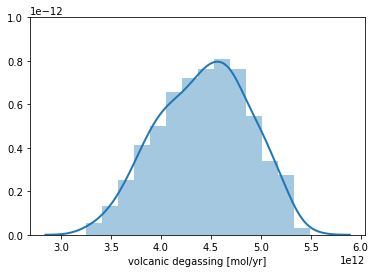

In [6]:
fig, ax = plt.subplots()

sns.distplot(compiled_df['volcanic_degassing'], ax=ax,
             kde_kws={'linewidth':2})
ax.set_xlabel('volcanic degassing [mol/yr]')

plt.show(fig)

/Users/yuempark/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


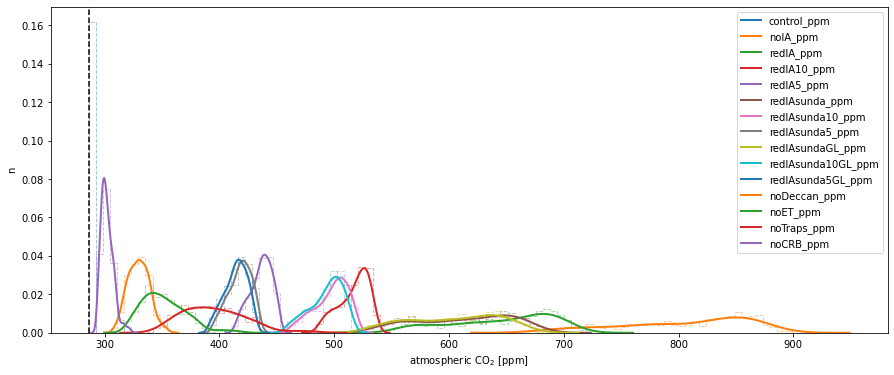

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

bins = np.linspace(np.min(compiled_df[compiled_df_scenario_list].values),
                   np.max(compiled_df[compiled_df_scenario_list].values),
                   100)

for i in range(len(compiled_df_scenario_list)):
    
    sns.distplot(compiled_df[compiled_df_scenario_list[i]], bins=bins,
                 hist_kws={'color':'C'+str(i), 'linestyle':'--', 'histtype':'step'},
                 kde_kws={'color':'C'+str(i), 'linewidth':2, 'label':compiled_df_scenario_list[i]},
                 ax=ax)
    

ax.axvline(286, c='k', ls='--')

ax.set_xlabel('atmospheric CO$_{2}$ [ppm]')
ax.set_ylabel('n')
ax.legend()

plt.show(fig)

/Users/yuempark/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuempark/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/yuempark/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


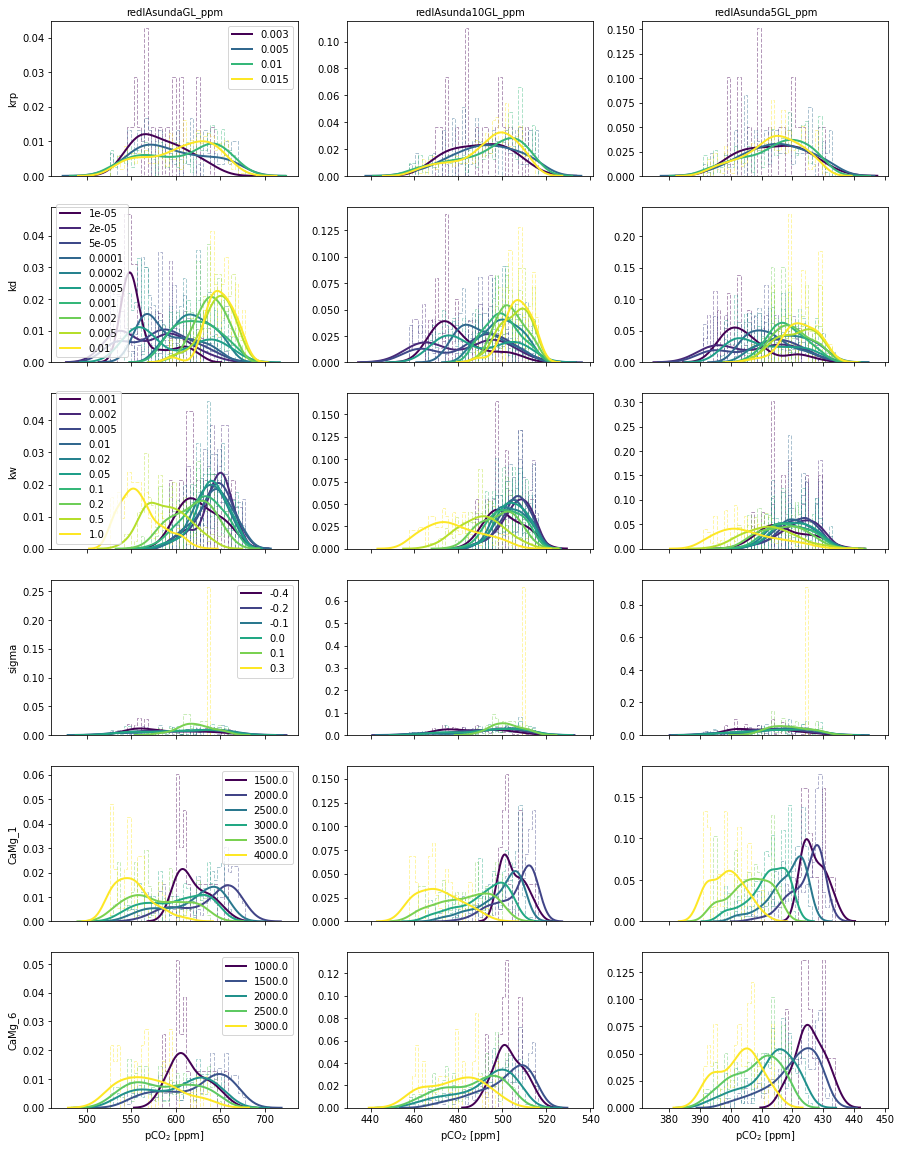

In [8]:
param_cols = ['krp','kd','kw','sigma','CaMg_1','CaMg_6']
distplot_scenario_list = ['redIAsundaGL_ppm','redIAsunda10GL_ppm','redIAsunda5GL_ppm']

fig, ax = plt.subplots(nrows=len(param_cols), ncols=len(distplot_scenario_list),
                       sharex='col', figsize=(15,20))

cmap = matplotlib.cm.get_cmap('viridis')

for i in range(len(param_cols)):
    
    unique_vals = compiled_df[param_cols[i]].unique()
    unique_vals = np.sort(unique_vals)
    
    colors = cmap(np.linspace(0,1,len(unique_vals)))
    
    for j in range(len(distplot_scenario_list)):
        
        bins = np.linspace(np.min(compiled_df[distplot_scenario_list[j]].values),
                           np.max(compiled_df[distplot_scenario_list[j]].values),
                           40)
        
        for k in range(len(unique_vals)):
            
            sns.distplot(compiled_df[compiled_df[param_cols[i]]==unique_vals[k]][distplot_scenario_list[j]],
                         bins=bins,
                         hist_kws={'color':colors[k], 'linestyle':'--', 'histtype':'step'},
                         kde_kws={'color':colors[k], 'linewidth':2, 'label':np.round(unique_vals[k],7)},
                         ax=ax[i][j])
            ax[i][j].set_xlabel('')
            ax[i][j].get_legend().remove()
            
        if i==0:
            ax[i][j].set_title(distplot_scenario_list[j], fontsize=10)
            
        if i==len(param_cols)-1:
            ax[i][j].set_xlabel('pCO$_{2}$ [ppm]')
            
        if j==0:
            ax[i][j].set_ylabel(param_cols[i])
            ax[i][j].legend()

plt.show(fig)

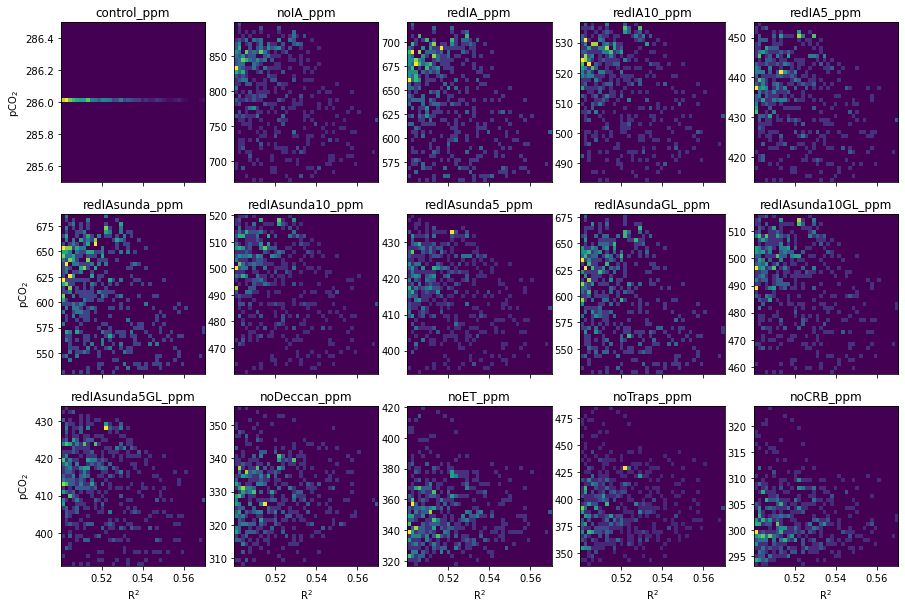

In [9]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,10), sharex=True)

ax = ax.flatten()

for i in range(len(compiled_df_scenario_list)):
    heatmap, xedges, yedges = np.histogram2d(compiled_df['R2'], compiled_df[compiled_df_scenario_list[i]],
                                             bins=40)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax[i].imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
    ax[i].set_title(compiled_df_scenario_list[i])
    
    if i in [0,5,10]:
        ax[i].set_ylabel('pCO$_{2}$')
        
    if i >=10:
        ax[i].set_xlabel('R$^{2}$')
        
    ax[0].set_xlim(np.min(compiled_df['R2']),np.max(compiled_df['R2']))
    
plt.show(fig)

In [10]:
R2_thresholds = np.arange(0.5,0.55,0.01)

R2_thresholds_test = pd.DataFrame({'threshold':R2_thresholds})

for i in range(len(R2_thresholds)):
    compiled_df_slice = compiled_df[compiled_df['R2']>=R2_thresholds[i]]
    
    for j in range(len(compiled_df_scenario_list)):
        pCO2_mean = np.mean(compiled_df_slice[compiled_df_scenario_list[j]])
        pCO2_02_5 = np.percentile(compiled_df_slice[compiled_df_scenario_list[j]], 2.5)
        pCO2_97_5 = np.percentile(compiled_df_slice[compiled_df_scenario_list[j]], 97.5)
        pCO2_n = len(compiled_df_slice[compiled_df_scenario_list[j]])
        
        R2_thresholds_test.loc[i,compiled_df_scenario_list[j]+'_mean'] = pCO2_mean
        R2_thresholds_test.loc[i,compiled_df_scenario_list[j]+'_02_5'] = pCO2_02_5
        R2_thresholds_test.loc[i,compiled_df_scenario_list[j]+'_97_5'] = pCO2_97_5
        R2_thresholds_test.loc[i,compiled_df_scenario_list[j]+'_n'] = pCO2_n

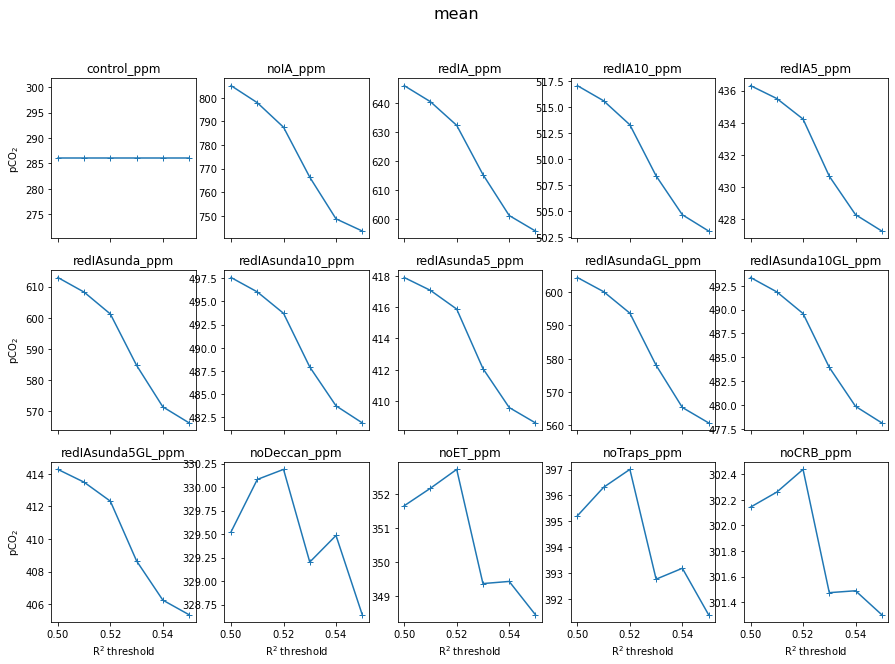

In [11]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,10), sharex=True)

ax = ax.flatten()

for i in range(len(compiled_df_scenario_list)):
    
    ax[i].plot(R2_thresholds_test['threshold'], R2_thresholds_test[compiled_df_scenario_list[i]+'_mean'],
               '+-')
    ax[i].set_title(compiled_df_scenario_list[i])
    
    if i in [0,5,10]:
        ax[i].set_ylabel('pCO$_{2}$')
        
    if i >=10:
        ax[i].set_xlabel('R$^{2}$ threshold')
    
fig.suptitle('mean', fontsize=16)

plt.show(fig)

/Users/yuempark/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


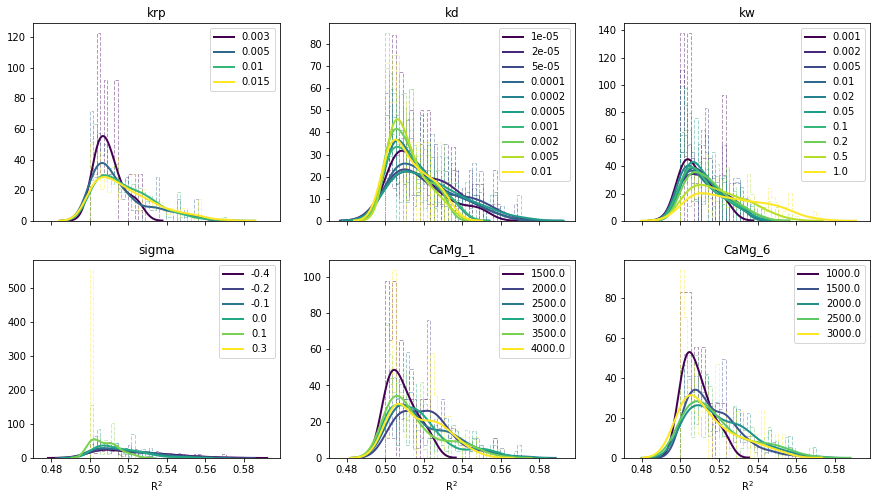

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8), sharex=True)

bins = np.linspace(np.min(compiled_df['R2']), np.max(compiled_df['R2']), 40)

ax = ax.flatten()

cmap = matplotlib.cm.get_cmap('viridis')

for i in range(len(param_cols)):
    unique_vals = np.array(compiled_df[param_cols[i]].unique())
    unique_vals = np.sort(unique_vals)
    
    colors = cmap(np.linspace(0,1,len(unique_vals)))
    
    for j in range(len(unique_vals)):
        sns.distplot(compiled_df['R2'][compiled_df[param_cols[i]]==unique_vals[j]],
                     bins=bins, hist=True,
                     hist_kws={'color':colors[j], 'linestyle':'--', 'histtype':'step'},
                     kde_kws={'color':colors[j], 'linewidth':2, 'label':np.round(unique_vals[j],7)},
                     ax=ax[i])
    ax[i].legend()
    ax[i].set_title(param_cols[i])
    
    if i>=3:
        ax[i].set_xlabel('R$^{2}$')
    else:
        ax[i].set_xlabel('')
    
plt.show(fig)

## PCA

In [13]:
# get a dataframe with just the changing parameters
stat_cols = ['krp','kd','kw','sigma','CaMg_1','CaMg_6','R2','volcanic_degassing','redIAsundaGL_ppm']
stat_df = compiled_df[stat_cols].copy()

# standardize
scaler = StandardScaler()
stat_df = scaler.fit_transform(stat_df)
stat_df = pd.DataFrame(data=stat_df, columns=stat_cols)

# PCA
pca = PCA()
PCA_Y = pca.fit_transform(stat_df)

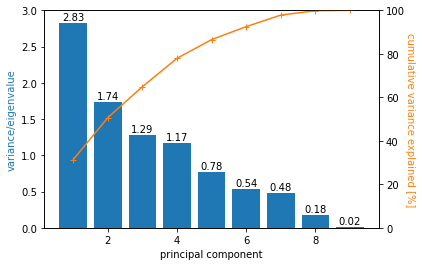

In [14]:
fig, ax = plt.subplots()

rects = ax.bar(np.arange(len(pca.explained_variance_))+1, pca.explained_variance_, color='C0')
ax.set_ylabel('variance/eigenvalue', color='C0')
ax.set_xlabel('principal component')
ax.set_ylim(0,3)

twinax = ax.twinx()
twinax.plot(np.arange(len(pca.explained_variance_ratio_))+1,
            np.cumsum(pca.explained_variance_ratio_)*100, '-+', color='C1')
twinax.set_ylim(0,100)
twinax.set_ylabel('cumulative variance explained [%]', rotation=270, color='C1', labelpad=10)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height>=0:
            ax.text(rect.get_x() + rect.get_width()/2, height+0.08,
                    np.round(height,2),
                    ha='center', va='center')
        else:
            ax.text(rect.get_x() + rect.get_width()/2, height-0.08,
                    np.round(height,2),
                    ha='center', va='center')
            
autolabel(rects)

plt.show(fig)

In [15]:
N = len(stat_cols)
for i in range(N):
    print('PC' + str(i+1) + ': ' + str(np.round(pca.explained_variance_ratio_[i]*100,1)) + '%')

PC1: 31.4%
PC2: 19.3%
PC3: 14.3%
PC4: 13.0%
PC5: 8.6%
PC6: 6.0%
PC7: 5.3%
PC8: 2.0%
PC9: 0.2%


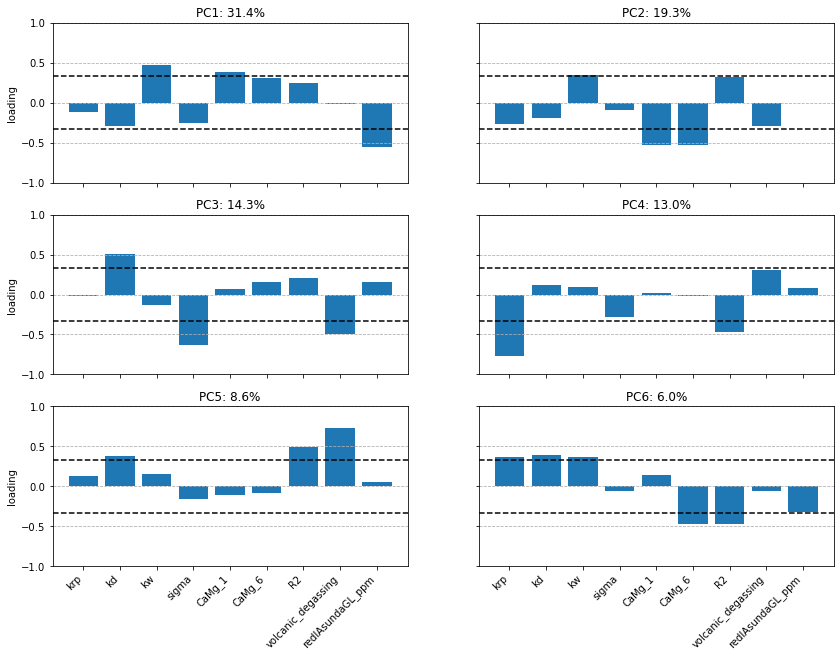

In [16]:
ind = np.arange(N)

component_names = []
for i in range(len(stat_cols)):
    component_names.append('PC ' + str(i+1))

eigenvectors = pd.DataFrame(pca.components_.T, columns=component_names, index=stat_cols)

cutoff = np.sqrt(1/len(stat_cols))

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(14,10), sharey=True, sharex=True)

ax = ax.flatten()

for i in range(6):
    ax[i].bar(ind, eigenvectors['PC ' + str(i+1)], color='C0')
    ax[i].set_ylim(-1,1)
    ax[i].yaxis.grid(ls='--')
    ax[i].axhline(cutoff, ls='--', c='k')
    ax[i].axhline(-cutoff, ls='--', c='k')
    ax[i].set_title('PC' + str(i+1) + ': ' + str(np.round(pca.explained_variance_ratio_[i]*100,1)) + '%')
    ax[i].set_xticklabels([])
    
ax[4].set_xticks(ind)
ax[4].set_xticklabels(stat_cols, rotation=45, ha='right')
ax[5].set_xticks(ind)
ax[5].set_xticklabels(stat_cols, rotation=45, ha='right')

ax[0].set_ylabel('loading')
ax[2].set_ylabel('loading')
ax[4].set_ylabel('loading')

plt.show(fig)

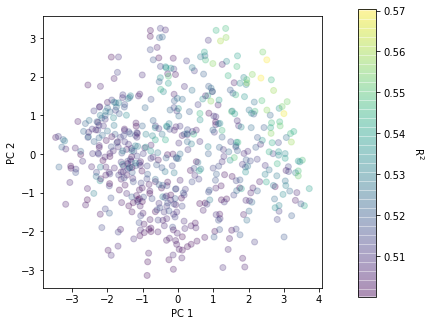

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

scatter = ax.scatter(PCA_Y[:,0], PCA_Y[:,1], alpha=0.25, c=compiled_df['R2'])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

cax = fig.add_axes([1, 0.1, 0.05, 0.8])
fig.colorbar(scatter, cax=cax)
cax.set_ylabel('R$^{2}$', rotation=270, labelpad=20)

plt.show(fig)

## Lithology

The lithology masks and cell areas:

In [18]:
path = '../Output/'

lith_mask_ctrl = Dataset(path+'lith_mask_360_720.nc')

lith_mask_noIA = Dataset(path+'lith_mask_noIA.nc')

lith_mask_redIA = Dataset(path+'lith_mask_redIA.nc')
lith_mask_redIAsundaGL = Dataset(path+'lith_mask_redIAsundaGL.nc')

lith_mask_redIA5 = Dataset(path+'lith_mask_redIA5.nc')
lith_mask_redIAsunda5GL = Dataset(path+'lith_mask_redIAsunda5GL.nc')

lith_mask_redIA10 = Dataset(path+'lith_mask_redIA10.nc')
lith_mask_redIAsunda10GL = Dataset(path+'lith_mask_redIAsunda10GL.nc')

cell_area = Dataset(path+'cell_area_360_720.nc')

land_area_ctrl = Dataset(path+'land_area_360_720.nc')
land_area_noIA = Dataset(path+'land_area_noIA.nc')
land_area_redIA = Dataset(path+'land_area_redIA.nc')
land_area_redIAsundaGL = Dataset(path+'land_area_redIAsundaGL.nc')
land_area_redIA5 = Dataset(path+'land_area_redIA5.nc')
land_area_redIAsunda5GL = Dataset(path+'land_area_redIAsunda5GL.nc')
land_area_redIA10 = Dataset(path+'land_area_redIA10.nc')
land_area_redIAsunda10GL = Dataset(path+'land_area_redIAsunda10GL.nc')

In [19]:
lith_mask_ctrl.variables.keys()

dict_keys(['lon', 'lat', 'lith', 'frac'])

In [20]:
cell_area.variables.keys()

dict_keys(['lon', 'lat', 'area'])

In [21]:
land_area_ctrl.variables.keys()

dict_keys(['lon', 'lat', 'area'])

The mask that includes all land masses that we consider part of the Indonesia Archipelago:

In [22]:
drive_path = '/Users/yuempark/Documents/Berkeley/Research_GEOCLIM/Paleogeo_GEOCLIM/'

IA_mask_nc = Dataset(drive_path + 'Land_Masks/IA_mask.nc')
IA_mask = IA_mask_nc.variables['Band1'][:,:].data
IA_mask[np.isnan(IA_mask)] = 0
IA_mask[IA_mask > 1e30] = 0

Extract area information about each of the lithologies:

In [23]:
# the number of lithologies, excluding the ocean
n_liths = len(lith_mask_ctrl.variables['lith']) - 1

# extract total lithology area for each scenario
global_lith_area = np.zeros(n_liths)
ctrl_lith_area = np.zeros(n_liths)
noIA_lith_area = np.zeros(n_liths)
redIA_lith_area = np.zeros(n_liths)
redIAsundaGL_lith_area = np.zeros(n_liths)
redIA5_lith_area = np.zeros(n_liths)
redIAsunda5GL_lith_area = np.zeros(n_liths)
redIA10_lith_area = np.zeros(n_liths)
redIAsunda10GL_lith_area = np.zeros(n_liths)

for i in range(1,n_liths+1):
    global_lith_area[i-1] = np.sum(lith_mask_ctrl.variables['frac'][i,:,:].data *\
                                   cell_area.variables['area'][:,:].data)
    ctrl_lith_area[i-1] = np.sum(lith_mask_ctrl.variables['frac'][i,:,:].data * IA_mask *\
                                 cell_area.variables['area'][:,:].data)
    noIA_lith_area[i-1] = np.sum(lith_mask_noIA.variables['frac'][i,:,:].data * IA_mask *\
                                 cell_area.variables['area'][:,:].data)
    redIA_lith_area[i-1] = np.sum(lith_mask_redIA.variables['frac'][i,:,:].data * IA_mask *\
                                  cell_area.variables['area'][:,:].data)
    redIAsundaGL_lith_area[i-1] = np.sum(lith_mask_redIAsundaGL.variables['frac'][i,:,:].data * IA_mask *\
                                         cell_area.variables['area'][:,:].data)
    redIA5_lith_area[i-1] = np.sum(lith_mask_redIA5.variables['frac'][i,:,:].data * IA_mask *\
                                   cell_area.variables['area'][:,:].data)
    redIAsunda5GL_lith_area[i-1] = np.sum(lith_mask_redIAsunda5GL.variables['frac'][i,:,:].data * IA_mask *\
                                          cell_area.variables['area'][:,:].data)
    redIA10_lith_area[i-1] = np.sum(lith_mask_redIA10.variables['frac'][i,:,:].data * IA_mask *\
                                    cell_area.variables['area'][:,:].data)
    redIAsunda10GL_lith_area[i-1] = np.sum(lith_mask_redIAsunda10GL.variables['frac'][i,:,:].data * IA_mask *\
                                           cell_area.variables['area'][:,:].data)

Total areas:

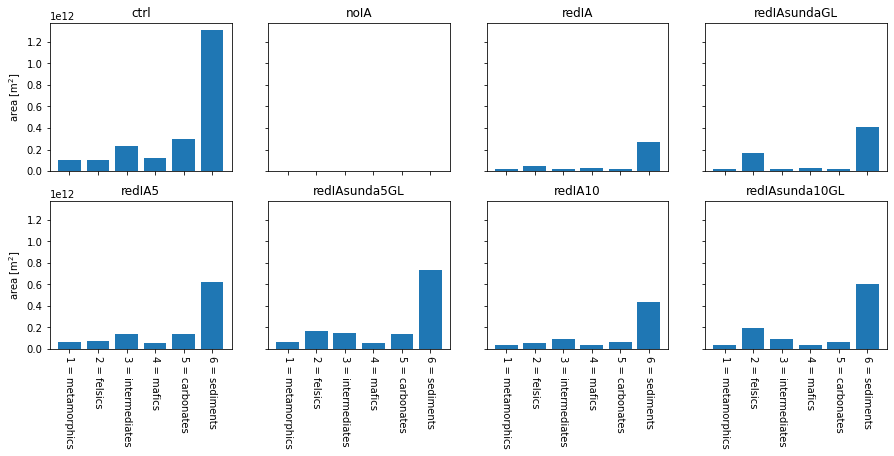

In [24]:
lith_class = ['1 = metamorphics',
              '2 = felsics',
              '3 = intermediates',
              '4 = mafics',
              '5 = carbonates',
              '6 = sediments']

# plot
scenario_lith_area_list = [ctrl_lith_area,
                           noIA_lith_area,
                           redIA_lith_area,
                           redIAsundaGL_lith_area,
                           redIA5_lith_area,
                           redIAsunda5GL_lith_area,
                           redIA10_lith_area,
                           redIAsunda10GL_lith_area]
scenario_name_list = ['ctrl',
                      'noIA',
                      'redIA',
                      'redIAsundaGL',
                      'redIA5',
                      'redIAsunda5GL',
                      'redIA10',
                      'redIAsunda10GL']

fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True, figsize=(15,6))

ax = ax.flatten()

x_inds = np.arange(n_liths)

for i in range(len(scenario_lith_area_list)):
    ax[i].bar(x_inds, scenario_lith_area_list[i])
    ax[i].set_xticks(x_inds)
    ax[i].set_xticklabels(lith_class, rotation=270)
    ax[i].set_title(scenario_name_list[i])
    
ax[0].set_ylabel('area [m$^{2}$]')
ax[4].set_ylabel('area [m$^{2}$]')
    
plt.show(fig)

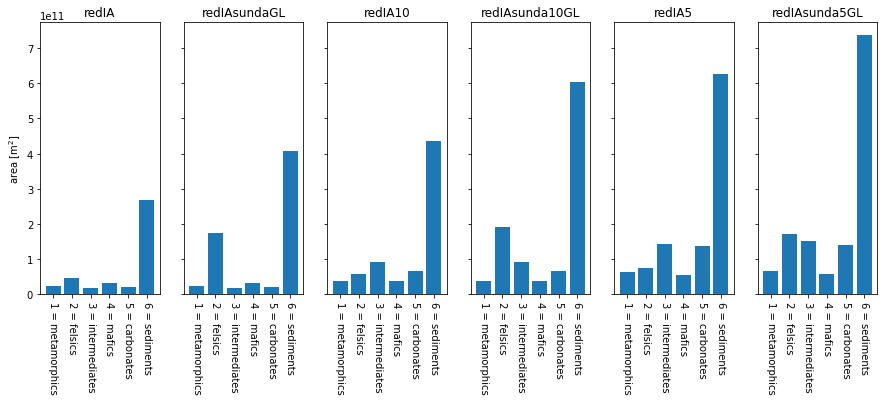

In [25]:
# plot
scenario_lith_area_list_mini = [redIA_lith_area,
                                redIAsundaGL_lith_area,
                                redIA10_lith_area,
                                redIAsunda10GL_lith_area,
                                redIA5_lith_area,
                                redIAsunda5GL_lith_area]
scenario_name_list_mini = ['redIA',
                           'redIAsundaGL',
                           'redIA10',
                           'redIAsunda10GL',
                           'redIA5',
                           'redIAsunda5GL']

fig, ax = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(15,5))

x_inds = np.arange(n_liths)

for i in range(len(scenario_lith_area_list_mini)):
    ax[i].bar(x_inds, scenario_lith_area_list_mini[i])
    ax[i].set_xticks(x_inds)
    ax[i].set_xticklabels(lith_class, rotation=270)
    ax[i].set_title(scenario_name_list_mini[i])
    
ax[0].set_ylabel('area [m$^{2}$]')
    
plt.show(fig)

Fractional areas:

/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


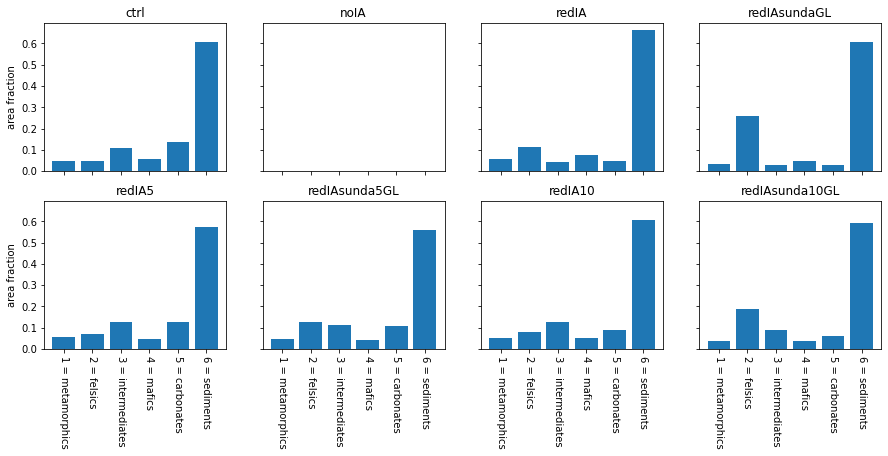

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True, figsize=(15,6))

ax = ax.flatten()

for i in range(len(scenario_lith_area_list)):
    ax[i].bar(x_inds, scenario_lith_area_list[i]/np.sum(scenario_lith_area_list[i]))
    ax[i].set_xticks(x_inds)
    ax[i].set_xticklabels(lith_class, rotation=270)
    ax[i].set_title(scenario_name_list[i])
    
ax[0].set_ylabel('area fraction')
ax[4].set_ylabel('area fraction')
    
plt.show(fig)

Change relative to the control:

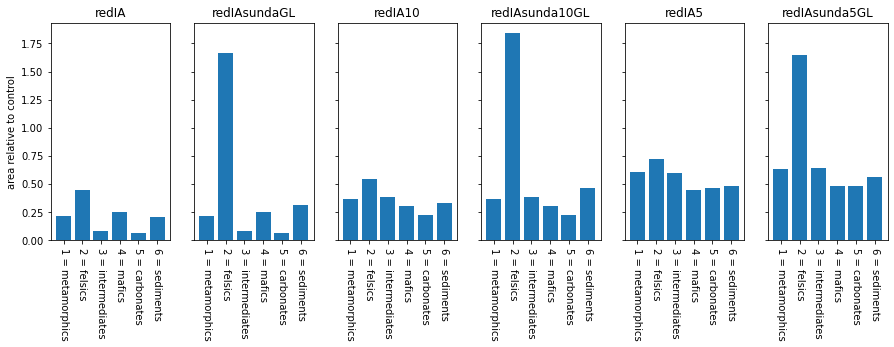

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(15,4))

x_inds = np.arange(n_liths)

for i in range(len(scenario_lith_area_list_mini)):
    ax[i].bar(x_inds, scenario_lith_area_list_mini[i]/ctrl_lith_area)
    ax[i].set_xticks(x_inds)
    ax[i].set_xticklabels(lith_class, rotation=270)
    ax[i].set_title(scenario_name_list_mini[i])
    
ax[0].set_ylabel('area relative to control')
    
plt.show(fig)

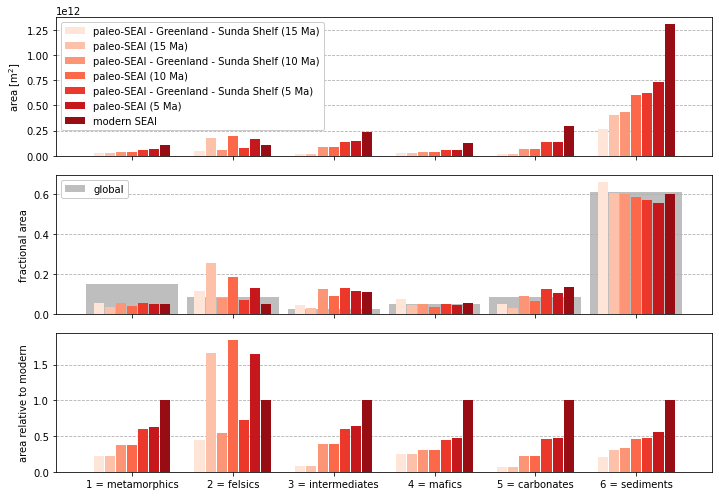

In [28]:
# plot
scenario_lith_area_list = [redIA_lith_area,
                           redIAsundaGL_lith_area,
                           redIA10_lith_area,
                           redIAsunda10GL_lith_area,
                           redIA5_lith_area,
                           redIAsunda5GL_lith_area,
                           ctrl_lith_area]
scenario_name_list = ['paleo-SEAI - Greenland - Sunda Shelf (15 Ma)',
                      'paleo-SEAI (15 Ma)',
                      'paleo-SEAI - Greenland - Sunda Shelf (10 Ma)',
                      'paleo-SEAI (10 Ma)',
                      'paleo-SEAI - Greenland - Sunda Shelf (5 Ma)',
                      'paleo-SEAI (5 Ma)',
                      'modern SEAI']

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,7))

x_inds = np.arange(n_liths)
width = 0.1
gap = 0.01

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.1,0.9,len(scenario_lith_area_list))

for i in range(len(scenario_lith_area_list)):
    ax[0].bar(x_inds + width*i + gap*i, scenario_lith_area_list[i],
              width, facecolor=cmap(cmap_inds[i]), label=scenario_name_list[i])
    ax[1].bar(x_inds + width*i + gap*i, scenario_lith_area_list[i]/np.sum(scenario_lith_area_list[i]),
              width, facecolor=cmap(cmap_inds[i]), label='__nolegend__')
    ax[2].bar(x_inds + width*i + gap*i, scenario_lith_area_list[i]/ctrl_lith_area,
              width, facecolor=cmap(cmap_inds[i]), label='__nolegend__')
    
ax[1].bar(x_inds + gap*3 + width*3, global_lith_area/np.sum(global_lith_area),
          width*len(scenario_lith_area_list) + gap*(len(scenario_lith_area_list)-1) + 0.15,
          facecolor='C7', alpha=0.5, zorder=-99, label='global')

ax[0].legend(framealpha=1)
ax[1].legend(framealpha=1)
ax[0].set_ylabel('area [m$^{2}$]')
ax[1].set_ylabel('fractional area')
ax[2].set_ylabel('area relative to modern')

ax[2].set_xticks(x_inds + gap*3 + width*3)
ax[2].set_xticklabels(lith_class)

for i in range(3):
    ax[i].grid(axis='y', ls='--')
    ax[i].set_axisbelow(True)
    
fig.tight_layout()
#fig.savefig('../../Manuscript/Figures/lithology_areas.pdf', bbox_inches='tight')
plt.show(fig)

Area weighted mean Ca+Mg for "radiogenic" (metamorphics, felsics, sediments) vs. "juvenile" (intermediates, mafics):

In [29]:
radiogenic_CaMg = (ctrl_lith_area[0]*2500 + ctrl_lith_area[1]*1521 + ctrl_lith_area[5]*2000)/\
                  np.sum(ctrl_lith_area[[0,1,5]])
juvenile_CaMg = (ctrl_lith_area[2]*4759 + ctrl_lith_area[3]*10317)/\
                np.sum(ctrl_lith_area[[2,3]])

print('radiogenic = {:.1f} mol/m3'.format(radiogenic_CaMg))
print('juvenile   = {:.1f} mol/m3'.format(juvenile_CaMg))

radiogenic = 2001.0 mol/m3
juvenile   = 6652.0 mol/m3


## CO$_{2}$ Consumption

In [30]:
# extract the weathering maps
ctrl_weathering = control_nc.variables['weathering'][:,:,:].data
redIA_weathering = redIA_nc.variables['weathering'][:,:,:].data
redIA10_weathering = redIA10_nc.variables['weathering'][:,:,:].data
redIA5_weathering = redIA5_nc.variables['weathering'][:,:,:].data
redIAsundaGL_weathering = redIAsundaGL_nc.variables['weathering'][:,:,:].data
redIAsunda10GL_weathering = redIAsunda10GL_nc.variables['weathering'][:,:,:].data
redIAsunda5GL_weathering = redIAsunda5GL_nc.variables['weathering'][:,:,:].data

Some unit conversions:

In [31]:
# set fill value to 0
ctrl_weathering[ctrl_weathering > 1e30] = 0
redIA_weathering[redIA_weathering > 1e30] = 0
redIA10_weathering[redIA10_weathering > 1e30] = 0
redIA5_weathering[redIA5_weathering > 1e30] = 0
redIAsundaGL_weathering[redIAsundaGL_weathering > 1e30] = 0
redIAsunda10GL_weathering[redIAsunda10GL_weathering > 1e30] = 0
redIAsunda5GL_weathering[redIAsunda5GL_weathering > 1e30] = 0

# the number of runs
n_runs = np.shape(ctrl_weathering)[0]

ctrl_weathering_sum = np.zeros_like(ctrl_weathering)
redIA_weathering_sum = np.zeros_like(redIA_weathering)
redIA10_weathering_sum = np.zeros_like(redIA10_weathering)
redIA5_weathering_sum = np.zeros_like(redIA5_weathering)
redIAsundaGL_weathering_sum = np.zeros_like(redIAsundaGL_weathering)
redIAsunda10GL_weathering_sum = np.zeros_like(redIAsunda10GL_weathering)
redIAsunda5GL_weathering_sum = np.zeros_like(redIAsunda5GL_weathering)

# convert from mol/m2/yr to mol/yr
for i in range(n_runs):
    ctrl_weathering_sum[i,:,:] = ctrl_weathering[i,:,:]*\
                                 land_area_ctrl.variables['area'][:,:].data
    redIA_weathering_sum[i,:,:] = redIA_weathering[i,:,:]*\
                                  land_area_redIA.variables['area'][:,:].data
    redIA10_weathering_sum[i,:,:] = redIA10_weathering[i,:,:]*\
                                    land_area_redIA10.variables['area'][:,:].data
    redIA5_weathering_sum[i,:,:] = redIA5_weathering[i,:,:]*\
                                   land_area_redIA5.variables['area'][:,:].data
    redIAsundaGL_weathering_sum[i,:,:] = redIAsundaGL_weathering[i,:,:]*\
                                         land_area_redIAsundaGL.variables['area'][:,:].data
    redIAsunda10GL_weathering_sum[i,:,:] = redIAsunda10GL_weathering[i,:,:]*\
                                           land_area_redIAsunda10GL.variables['area'][:,:].data
    redIAsunda5GL_weathering_sum[i,:,:] = redIAsunda5GL_weathering[i,:,:]*\
                                          land_area_redIAsunda5GL.variables['area'][:,:].data

Check that CO$_{2}$ consumption matches degassing:

In [32]:
ctrl_check = np.sum(ctrl_weathering_sum, axis=(1,2))/compiled_df['volcanic_degassing']
redIA_check = np.sum(redIA_weathering_sum, axis=(1,2))/compiled_df['volcanic_degassing']
redIA10_check = np.sum(redIA10_weathering_sum, axis=(1,2))/compiled_df['volcanic_degassing']
redIA5_check = np.sum(redIA5_weathering_sum, axis=(1,2))/compiled_df['volcanic_degassing']
redIAsundaGL_check = np.sum(redIAsundaGL_weathering_sum, axis=(1,2))/compiled_df['volcanic_degassing']
redIAsunda10GL_check = np.sum(redIAsunda10GL_weathering_sum, axis=(1,2))/compiled_df['volcanic_degassing']
redIAsunda5GL_check = np.sum(redIAsunda5GL_weathering_sum, axis=(1,2))/compiled_df['volcanic_degassing']

print('ctrl           : min = {:.2f} : max = {:.2f}'.format(np.min(ctrl_check),np.max(ctrl_check)))
print('redIA          : min = {:.2f} : max = {:.2f}'.format(np.min(redIA_check),np.max(redIA_check)))
print('redIA10        : min = {:.2f} : max = {:.2f}'.format(np.min(redIA10_check),np.max(redIA10_check)))
print('redIA5         : min = {:.2f} : max = {:.2f}'.format(np.min(redIA5_check),np.max(redIA5_check)))
print('redIAsundaGL   : min = {:.2f} : max = {:.2f}'.format(np.min(redIAsundaGL_check),np.max(redIAsundaGL_check)))
print('redIAsunda10GL : min = {:.2f} : max = {:.2f}'.format(np.min(redIAsunda10GL_check),np.max(redIAsunda10GL_check)))
print('redIAsunda5GL  : min = {:.2f} : max = {:.2f}'.format(np.min(redIAsunda5GL_check),np.max(redIAsunda5GL_check)))

ctrl           : min = 1.00 : max = 1.00
redIA          : min = 1.00 : max = 1.00
redIA10        : min = 1.00 : max = 1.00
redIA5         : min = 1.00 : max = 1.00
redIAsundaGL   : min = 1.00 : max = 1.00
redIAsunda10GL : min = 1.00 : max = 1.00
redIAsunda5GL  : min = 1.00 : max = 1.00


SEAI CO$_{2}$ consumption in each of the different scenarios:

In [33]:
# extract total CO2 consumption in IA for each scenario
ctrl_IA_CO2 = np.zeros(n_runs)
redIA_IA_CO2 = np.zeros(n_runs)
redIA10_IA_CO2 = np.zeros(n_runs)
redIA5_IA_CO2 = np.zeros(n_runs)
redIAsundaGL_IA_CO2 = np.zeros(n_runs)
redIAsunda10GL_IA_CO2 = np.zeros(n_runs)
redIAsunda5GL_IA_CO2 = np.zeros(n_runs)

for i in range(n_runs):
    ctrl_IA_CO2[i] = np.sum(ctrl_weathering_sum[i,:,:]*IA_mask)/\
                     np.sum(ctrl_weathering_sum[i,:,:])
    redIA_IA_CO2[i] = np.sum(redIA_weathering_sum[i,:,:]*IA_mask)/\
                      np.sum(redIA_weathering_sum[i,:,:])
    redIA10_IA_CO2[i] = np.sum(redIA10_weathering_sum[i,:,:]*IA_mask)/\
                        np.sum(redIA10_weathering_sum[i,:,:])
    redIA5_IA_CO2[i] = np.sum(redIA5_weathering_sum[i,:,:]*IA_mask)/\
                       np.sum(redIA5_weathering_sum[i,:,:])
    redIAsundaGL_IA_CO2[i] = np.sum(redIAsundaGL_weathering_sum[i,:,:]*IA_mask)/\
                             np.sum(redIAsundaGL_weathering_sum[i,:,:])
    redIAsunda10GL_IA_CO2[i] = np.sum(redIAsunda10GL_weathering_sum[i,:,:]*IA_mask)/\
                               np.sum(redIAsunda10GL_weathering_sum[i,:,:])
    redIAsunda5GL_IA_CO2[i] = np.sum(redIAsunda5GL_weathering_sum[i,:,:]*IA_mask)/\
                              np.sum(redIAsunda5GL_weathering_sum[i,:,:])

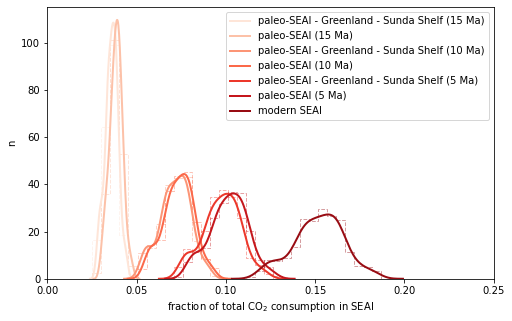

In [34]:
scenario_IA_CO2_frac_list = [redIA_IA_CO2,
                             redIAsundaGL_IA_CO2,
                             redIA10_IA_CO2,
                             redIAsunda10GL_IA_CO2,
                             redIA5_IA_CO2,
                             redIAsunda5GL_IA_CO2,
                             ctrl_IA_CO2]
scenario_name_list = ['paleo-SEAI - Greenland - Sunda Shelf (15 Ma)',
                      'paleo-SEAI (15 Ma)',
                      'paleo-SEAI - Greenland - Sunda Shelf (10 Ma)',
                      'paleo-SEAI (10 Ma)',
                      'paleo-SEAI - Greenland - Sunda Shelf (5 Ma)',
                      'paleo-SEAI (5 Ma)',
                      'modern SEAI']

fig, ax = plt.subplots(figsize=(8,5))

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.1,0.9,len(scenario_IA_CO2_frac_list))

bins = np.linspace(0, 0.5, 100)

for i in range(len(scenario_IA_CO2_frac_list)):
    
    sns.distplot(scenario_IA_CO2_frac_list[i], bins=bins,
                 hist_kws={'color':cmap(cmap_inds[i]), 'linestyle':'--', 'histtype':'step'},
                 kde_kws={'color':cmap(cmap_inds[i]), 'linewidth':2, 'label':scenario_name_list[i]},
                 ax=ax)

ax.set_xlabel('fraction of total CO$_{2}$ consumption in SEAI')
ax.set_ylabel('n')
ax.set_xlim(0,0.25)
ax.legend()

#fig.savefig('../../Manuscript/Figures/SEAI_CO2_consumption.pdf', bbox_inches='tight')
plt.show(fig)

CO$_{2}$ consumption from each of the lithologies:

In [35]:
# get Ca+Mg concentrations for each lithology for each run (mol/m3)
lith_CaMg = np.zeros((n_runs,7))
lith_CaMg[:,1:] = test_params[['CaMg_1', 'CaMg_2', 'CaMg_3', 'CaMg_4', 'CaMg_5', 'CaMg_6']].values

In [36]:
# get fraction-weighted concentrations
ctrl_CaMg_weighted = np.zeros((n_runs,7,360,720))
redIA_CaMg_weighted = np.zeros((n_runs,7,360,720))
redIA10_CaMg_weighted = np.zeros((n_runs,7,360,720))
redIA5_CaMg_weighted = np.zeros((n_runs,7,360,720))
redIAsundaGL_CaMg_weighted = np.zeros((n_runs,7,360,720))
redIAsunda10GL_CaMg_weighted = np.zeros((n_runs,7,360,720))
redIAsunda5GL_CaMg_weighted = np.zeros((n_runs,7,360,720))

for i in range(n_runs):
    ctrl_CaMg_weighted[i,:,:,:] = lith_CaMg[i,:][:,None,None]*\
                                  lith_mask_ctrl.variables['frac'][:,:,:].data
    redIA_CaMg_weighted[i,:,:,:] = lith_CaMg[i,:][:,None,None]*\
                                   lith_mask_redIA.variables['frac'][:,:,:].data
    redIA10_CaMg_weighted[i,:,:,:] = lith_CaMg[i,:][:,None,None]*\
                                     lith_mask_redIA10.variables['frac'][:,:,:].data
    redIA5_CaMg_weighted[i,:,:,:] = lith_CaMg[i,:][:,None,None]*\
                                    lith_mask_redIA5.variables['frac'][:,:,:].data
    redIAsundaGL_CaMg_weighted[i,:,:,:] = lith_CaMg[i,:][:,None,None]*\
                                          lith_mask_redIAsundaGL.variables['frac'][:,:,:].data
    redIAsunda10GL_CaMg_weighted[i,:,:,:] = lith_CaMg[i,:][:,None,None]*\
                                            lith_mask_redIAsunda10GL.variables['frac'][:,:,:].data
    redIAsunda5GL_CaMg_weighted[i,:,:,:] = lith_CaMg[i,:][:,None,None]*\
                                           lith_mask_redIAsunda5GL.variables['frac'][:,:,:].data

In [37]:
# get total (all cation) weathering (m/yr)
ctrl_all_weathering = np.zeros_like(ctrl_weathering)
redIA_all_weathering = np.zeros_like(redIA_weathering)
redIA10_all_weathering = np.zeros_like(redIA10_weathering)
redIA5_all_weathering = np.zeros_like(redIA5_weathering)
redIAsundaGL_all_weathering = np.zeros_like(redIAsundaGL_weathering)
redIAsunda10GL_all_weathering = np.zeros_like(redIAsunda10GL_weathering)
redIAsunda5GL_all_weathering = np.zeros_like(redIAsunda5GL_weathering)

for i in range(n_runs):
    ctrl_all_weathering[i,:,:] = ctrl_weathering[i,:,:]/\
                                 np.sum(ctrl_CaMg_weighted[i,:,:,:],axis=0)
    redIA_all_weathering[i,:,:] = redIA_weathering[i,:,:]/\
                                  np.sum(redIA_CaMg_weighted[i,:,:,:],axis=0)
    redIA10_all_weathering[i,:,:] = redIA10_weathering[i,:,:]/\
                                    np.sum(redIA10_CaMg_weighted[i,:,:,:],axis=0)
    redIA5_all_weathering[i,:,:] = redIA5_weathering[i,:,:]/\
                                   np.sum(redIA5_CaMg_weighted[i,:,:,:],axis=0)
    redIAsundaGL_all_weathering[i,:,:] = redIAsundaGL_weathering[i,:,:]/\
                                         np.sum(redIAsundaGL_CaMg_weighted[i,:,:,:],axis=0)
    redIAsunda10GL_all_weathering[i,:,:] = redIAsunda10GL_weathering[i,:,:]/\
                                           np.sum(redIAsunda10GL_CaMg_weighted[i,:,:,:],axis=0)
    redIAsunda5GL_all_weathering[i,:,:] = redIAsunda5GL_weathering[i,:,:]/\
                                          np.sum(redIAsunda5GL_CaMg_weighted[i,:,:,:],axis=0)
    
ctrl_all_weathering[~np.isfinite(ctrl_all_weathering)] = 0
redIA_all_weathering[~np.isfinite(redIA_all_weathering)] = 0
redIA10_all_weathering[~np.isfinite(redIA10_all_weathering)] = 0
redIA5_all_weathering[~np.isfinite(redIA5_all_weathering)] = 0
redIAsundaGL_all_weathering[~np.isfinite(redIAsundaGL_all_weathering)] = 0
redIAsunda10GL_all_weathering[~np.isfinite(redIAsunda10GL_all_weathering)] = 0
redIAsunda5GL_all_weathering[~np.isfinite(redIAsunda5GL_all_weathering)] = 0

/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered i

In [38]:
# get weathering from each lithology (mol/yr)
ctrl_lith_CO2 = np.zeros((n_runs,7))
redIA_lith_CO2 = np.zeros((n_runs,7))
redIA10_lith_CO2 = np.zeros((n_runs,7))
redIA5_lith_CO2 = np.zeros((n_runs,7))
redIAsundaGL_lith_CO2 = np.zeros((n_runs,7))
redIAsunda10GL_lith_CO2 = np.zeros((n_runs,7))
redIAsunda5GL_lith_CO2 = np.zeros((n_runs,7))

for i in range(n_runs):
    ctrl_lith_CO2[i,:] = np.sum(ctrl_all_weathering[i,:,:][None,:,:]*\
                                ctrl_CaMg_weighted[i,:,:,:]*\
                                land_area_ctrl.variables['area'][:,:].data[None,:,:],
                                axis=(1,2))
    redIA_lith_CO2[i,:] = np.sum(redIA_all_weathering[i,:,:][None,:,:]*\
                                 redIA_CaMg_weighted[i,:,:,:]*\
                                 land_area_redIA.variables['area'][:,:].data[None,:,:],
                                 axis=(1,2))
    redIA10_lith_CO2[i,:] = np.sum(redIA10_all_weathering[i,:,:][None,:,:]*\
                                   redIA10_CaMg_weighted[i,:,:,:]*\
                                   land_area_redIA10.variables['area'][:,:].data[None,:,:],
                                   axis=(1,2))
    redIA5_lith_CO2[i,:] = np.sum(redIA5_all_weathering[i,:,:][None,:,:]*\
                                  redIA5_CaMg_weighted[i,:,:,:]*\
                                  land_area_redIA5.variables['area'][:,:].data[None,:,:],
                                  axis=(1,2))
    redIAsundaGL_lith_CO2[i,:] = np.sum(redIAsundaGL_all_weathering[i,:,:][None,:,:]*\
                                        redIAsundaGL_CaMg_weighted[i,:,:,:]*\
                                        land_area_redIAsundaGL.variables['area'][:,:].data[None,:,:],
                                        axis=(1,2))
    redIAsunda10GL_lith_CO2[i,:] = np.sum(redIAsunda10GL_all_weathering[i,:,:][None,:,:]*\
                                          redIAsunda10GL_CaMg_weighted[i,:,:,:]*\
                                          land_area_redIAsunda10GL.variables['area'][:,:].data[None,:,:],
                                          axis=(1,2))
    redIAsunda5GL_lith_CO2[i,:] = np.sum(redIAsunda5GL_all_weathering[i,:,:][None,:,:]*\
                                         redIAsunda5GL_CaMg_weighted[i,:,:,:]*\
                                         land_area_redIAsunda5GL.variables['area'][:,:].data[None,:,:],
                                         axis=(1,2))

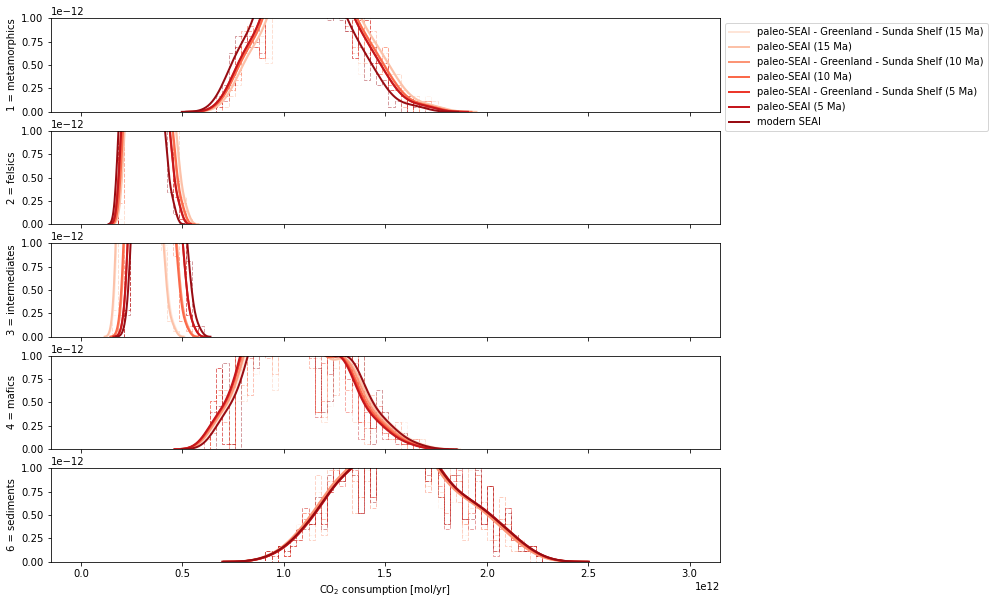

In [39]:
scenario_IA_lith_CO2_list = [redIA_lith_CO2,
                             redIAsundaGL_lith_CO2,
                             redIA10_lith_CO2,
                             redIAsunda10GL_lith_CO2,
                             redIA5_lith_CO2,
                             redIAsunda5GL_lith_CO2,
                             ctrl_lith_CO2]
scenario_name_list = ['paleo-SEAI - Greenland - Sunda Shelf (15 Ma)',
                      'paleo-SEAI (15 Ma)',
                      'paleo-SEAI - Greenland - Sunda Shelf (10 Ma)',
                      'paleo-SEAI (10 Ma)',
                      'paleo-SEAI - Greenland - Sunda Shelf (5 Ma)',
                      'paleo-SEAI (5 Ma)',
                      'modern SEAI']
lith_list = [1,2,3,4,6]
lith_class = ['1 = metamorphics',
              '2 = felsics',
              '3 = intermediates',
              '4 = mafics',
              '6 = sediments']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,10), sharex=True)

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.1,0.9,len(scenario_IA_lith_CO2_list))

bins = np.linspace(0, 3e12, 100)

for i in range(len(lith_list)):
    
    for j in range(len(scenario_IA_lith_CO2_list)):
    
        sns.distplot(scenario_IA_lith_CO2_list[j][:,lith_list[i]],bins=bins,
                     hist_kws={'color':cmap(cmap_inds[j]), 'linestyle':'--', 'histtype':'step'},
                     kde_kws={'color':cmap(cmap_inds[j]), 'linewidth':2, 'label':scenario_name_list[j]},
                     ax=ax[i])
    
    ax[i].set_ylabel(lith_class[i])
    ax[i].get_legend().set_visible(False)

ax[0].legend(bbox_to_anchor=(1,1), loc='upper left')
ax[4].set_xlabel('CO$_{2}$ consumption [mol/yr]')

plt.show(fig)

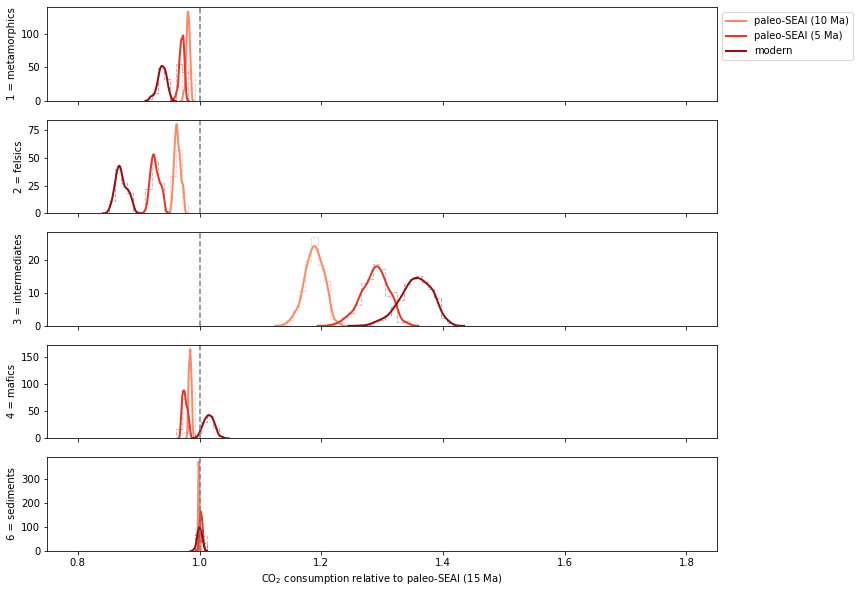

In [40]:
scenario_IA_lith_CO2_list = [redIAsunda10GL_lith_CO2,
                             redIAsunda5GL_lith_CO2,
                             ctrl_lith_CO2]
scenario_name_list = ['paleo-SEAI (10 Ma)',
                      'paleo-SEAI (5 Ma)',
                      'modern']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,10), sharex=True)

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.4,0.9,len(scenario_IA_lith_CO2_list))

bins = np.linspace(0.8, 1.8, 100)

for i in range(len(lith_list)):
    
    for j in range(len(scenario_IA_lith_CO2_list)):
    
        sns.distplot(scenario_IA_lith_CO2_list[j][:,lith_list[i]]/redIAsundaGL_lith_CO2[:,lith_list[i]],
                     bins=bins,
                     hist_kws={'color':cmap(cmap_inds[j]), 'linestyle':'--', 'histtype':'step'},
                     kde_kws={'color':cmap(cmap_inds[j]), 'linewidth':2, 'label':scenario_name_list[j]},
                     ax=ax[i])
    
    ax[i].set_ylabel(lith_class[i])
    ax[i].get_legend().set_visible(False)
    ax[i].axvline(1, ls='--', c='C7')

ax[0].legend(bbox_to_anchor=(1,1), loc='upper left')
ax[4].set_xlabel('CO$_{2}$ consumption relative to paleo-SEAI (15 Ma)')

plt.show(fig)

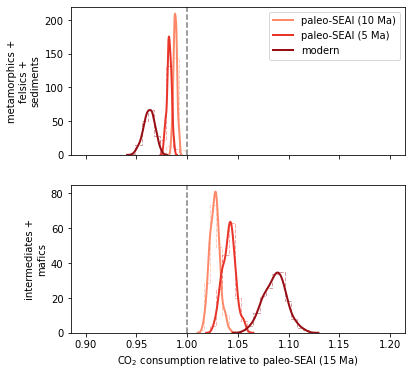

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6), sharex=True)

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.4,0.9,len(scenario_IA_lith_CO2_list))

bins = np.linspace(0.9, 1.2, 50)

for i in range(len(scenario_IA_lith_CO2_list)):
    sns.distplot((scenario_IA_lith_CO2_list[i][:,1]+\
                  scenario_IA_lith_CO2_list[i][:,2]+\
                  scenario_IA_lith_CO2_list[i][:,6])/\
                 (redIAsundaGL_lith_CO2[:,1]+redIAsundaGL_lith_CO2[:,2]+redIAsundaGL_lith_CO2[:,6]),
                 bins=bins,
                 hist_kws={'color':cmap(cmap_inds[i]), 'linestyle':'--', 'histtype':'step'},
                 kde_kws={'color':cmap(cmap_inds[i]), 'linewidth':2, 'label':scenario_name_list[i]},
                 ax=ax[0])
    
    sns.distplot((scenario_IA_lith_CO2_list[i][:,3]+\
                  scenario_IA_lith_CO2_list[i][:,4])/\
                 (redIAsundaGL_lith_CO2[:,3]+redIAsundaGL_lith_CO2[:,4]),
                 bins=bins,
                 hist_kws={'color':cmap(cmap_inds[i]), 'linestyle':'--', 'histtype':'step'},
                 kde_kws={'color':cmap(cmap_inds[i]), 'linewidth':2, 'label':scenario_name_list[i]},
                 ax=ax[1])
    
ax[0].set_ylabel('metamorphics +\nfelsics +\nsediments')
ax[0].legend(loc='upper right')
ax[0].axvline(1, ls='--', c='C7')

ax[1].get_legend().set_visible(False)
ax[1].set_ylabel('intermediates +\nmafics')
ax[1].set_xlabel('CO$_{2}$ consumption relative to paleo-SEAI (15 Ma)')
ax[1].axvline(1, ls='--', c='C7')

#plt.savefig('../../Manuscript/Figures/lithology_CO2_consumption.pdf', bbox_inches='tight')
plt.show(fig)

In [42]:
for i in range(len(scenario_IA_lith_CO2_list)):
    radiogenic = (scenario_IA_lith_CO2_list[i][:,1]+\
                  scenario_IA_lith_CO2_list[i][:,2]+\
                  scenario_IA_lith_CO2_list[i][:,6])/\
                 (redIAsundaGL_lith_CO2[:,1]+redIAsundaGL_lith_CO2[:,2]+redIAsundaGL_lith_CO2[:,6])
    juvenile = (scenario_IA_lith_CO2_list[i][:,3]+\
                scenario_IA_lith_CO2_list[i][:,4])/\
               (redIAsundaGL_lith_CO2[:,3]+redIAsundaGL_lith_CO2[:,4])
    
    print(scenario_name_list[i])
    print('radiogenic min  : {:.4f}'.format(np.min(radiogenic)))
    print('radiogenic max  : {:.4f}'.format(np.max(radiogenic)))
    print('radiogenic mean : {:.4f}'.format(np.mean(radiogenic)))
    print('juvenile min    : {:.4f}'.format(np.min(juvenile)))
    print('juvenile max    : {:.4f}'.format(np.max(juvenile)))
    print('juvenile mean   : {:.4f}'.format(np.mean(juvenile)))
    print('')

paleo-SEAI (10 Ma)
radiogenic min  : 0.9833
radiogenic max  : 0.9929
radiogenic mean : 0.9883
juvenile min    : 1.0146
juvenile max    : 1.0427
juvenile mean   : 1.0271

paleo-SEAI (5 Ma)
radiogenic min  : 0.9757
radiogenic max  : 0.9879
radiogenic mean : 0.9822
juvenile min    : 1.0244
juvenile max    : 1.0595
juvenile mean   : 1.0411

modern
radiogenic min  : 0.9457
radiogenic max  : 0.9752
radiogenic mean : 0.9624
juvenile min    : 1.0549
juvenile max    : 1.1192
juvenile mean   : 1.0864



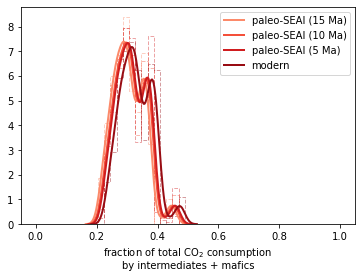

In [43]:
scenario_IA_lith_CO2_list = [redIAsundaGL_lith_CO2,
                             redIAsunda10GL_lith_CO2,
                             redIAsunda5GL_lith_CO2,
                             ctrl_lith_CO2]
scenario_name_list = ['paleo-SEAI (15 Ma)',
                      'paleo-SEAI (10 Ma)',
                      'paleo-SEAI (5 Ma)',
                      'modern']

fig, ax = plt.subplots()

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.4,0.9,len(scenario_IA_lith_CO2_list))

bins = np.linspace(0, 1, 50)

for i in range(len(scenario_IA_lith_CO2_list)):
    
    sns.distplot((scenario_IA_lith_CO2_list[i][:,3]+\
                  scenario_IA_lith_CO2_list[i][:,4])/\
                 np.sum(scenario_IA_lith_CO2_list[i],axis=1),
                 bins=bins,
                 hist_kws={'color':cmap(cmap_inds[i]), 'linestyle':'--', 'histtype':'step'},
                 kde_kws={'color':cmap(cmap_inds[i]), 'linewidth':2, 'label':scenario_name_list[i]},
                 ax=ax)
    
ax.legend(loc='upper right')
ax.set_xlabel('fraction of total CO$_{2}$ consumption\nby intermediates + mafics')

plt.show(fig)

In [44]:
for i in range(len(scenario_IA_lith_CO2_list)):
    juvenile_fraction = (scenario_IA_lith_CO2_list[i][:,3]+\
                         scenario_IA_lith_CO2_list[i][:,4])/\
                        np.sum(scenario_IA_lith_CO2_list[i],axis=1)
    
    print(scenario_name_list[i])
    print('juvenile fraction min    : {:.4f}'.format(np.min(juvenile_fraction)))
    print('juvenile fraction max    : {:.4f}'.format(np.max(juvenile_fraction)))
    print('juvenile fraction mean   : {:.4f}'.format(np.mean(juvenile_fraction)))
    print('')

paleo-SEAI (15 Ma)
juvenile fraction min    : 0.2096
juvenile fraction max    : 0.4535
juvenile fraction mean   : 0.3051

paleo-SEAI (10 Ma)
juvenile fraction min    : 0.2157
juvenile fraction max    : 0.4618
juvenile fraction mean   : 0.3132

paleo-SEAI (5 Ma)
juvenile fraction min    : 0.2197
juvenile fraction max    : 0.4662
juvenile fraction mean   : 0.3174

modern
juvenile fraction min    : 0.2296
juvenile fraction max    : 0.4823
juvenile fraction mean   : 0.3310



## pCO$_{2}$ Proxies

In [45]:
# data from Foster et al. (2017) compilation
pCO2_alkenones = pd.read_csv('../Input/pCO2/Foster2017a_alkenones.csv')
pCO2_boron = pd.read_csv('../Input/pCO2/Foster2017a_boron.csv')
pCO2_liverworts = pd.read_csv('../Input/pCO2/Foster2017a_liverworts.csv')
pCO2_paleosols = pd.read_csv('../Input/pCO2/Foster2017a_paleosols.csv')
pCO2_stomat = pd.read_csv('../Input/pCO2/Foster2017a_stomat.csv')

pCO2_all = pd.concat([pCO2_alkenones,pCO2_boron,pCO2_liverworts,pCO2_paleosols,pCO2_stomat], ignore_index=True)

pCO2_LOESS = pd.read_csv('../Input/pCO2/Foster2017a_LOESS.csv')

# data from Bereiter et al. (2015) EPICA Dome C
pCO2_EPICA = pd.read_csv('../Input/pCO2/Bereiter2015a.csv')

# data from Ji et al. (2018) paleosols
pCO2_Ji = pd.read_csv('../Input/pCO2/Ji2018a.csv')
pCO2_Ji = pCO2_Ji[pCO2_Ji['source']=='Ji et al. (2018)']

# data from Cui et al. (2020) d13C of C3 plants
pCO2_Cui = pd.read_csv('../Input/pCO2/Cui2020a.csv')

In [46]:
pCO2_Cui.head()

,Sample_ID,Age_Ma,d13C_p,d13C_atm,d13C_anomaly,CO2_ppm,Substrate
0,930,0.008,-27.2,-6.6,2.0,395,TOM
1,1331,0.009,-29.0,-6.7,-1.3,216,Lipids
2,1332,0.018,-27.8,-7.3,-3.1,158,Lipids
3,931,0.024,-27.5,-7.3,1.6,369,TOM
4,1333,0.029,-27.3,-7.1,-3.4,151,Lipids


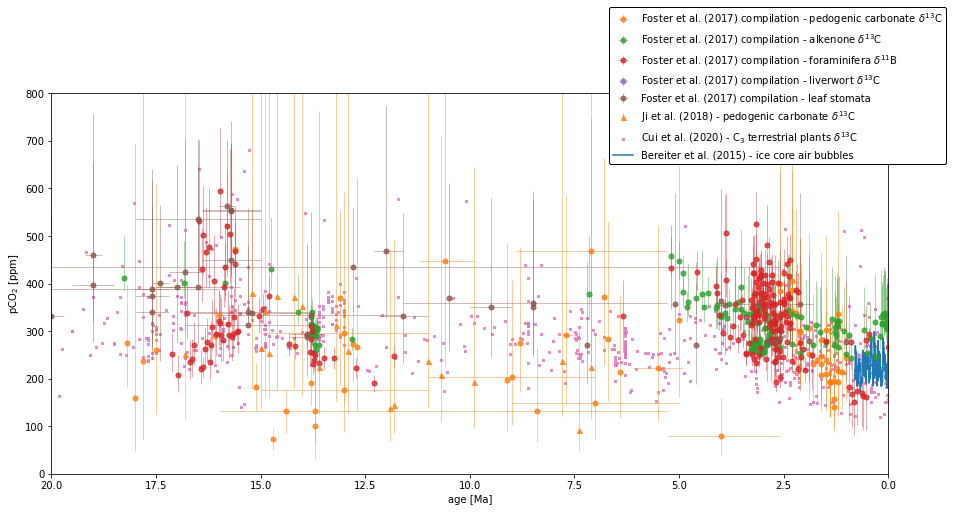

In [47]:
fig, ax = plt.subplots(figsize=(15,7))

markersize = 5

h1 = ax.errorbar(pCO2_paleosols['Age_Ma'], pCO2_paleosols['CO2_ppm'],
                 xerr=[pCO2_paleosols['Age_Ma']-pCO2_paleosols['Age_young'], pCO2_paleosols['Age_old']-pCO2_paleosols['Age_Ma']],
                 yerr=[pCO2_paleosols['CO2_ppm']-pCO2_paleosols['CO2_low'], pCO2_paleosols['CO2_high']-pCO2_paleosols['CO2_ppm']],
                 linestyle='none', elinewidth=0.5, alpha=0.8, c='C1', marker='o', markersize=markersize,
                 label='Foster et al. (2017) compilation - pedogenic carbonate $\delta^{13}$C')
h2 = ax.errorbar(pCO2_alkenones['Age_Ma'], pCO2_alkenones['CO2_ppm'],
                 xerr=[pCO2_alkenones['Age_Ma']-pCO2_alkenones['Age_young'], pCO2_alkenones['Age_old']-pCO2_alkenones['Age_Ma']],
                 yerr=[pCO2_alkenones['CO2_ppm']-pCO2_alkenones['CO2_low'], pCO2_alkenones['CO2_high']-pCO2_alkenones['CO2_ppm']],
                 linestyle='none', elinewidth=0.5, alpha=0.8, c='C2', marker='o', markersize=markersize,
                 label='Foster et al. (2017) compilation - alkenone $\delta^{13}$C')
h3 = ax.errorbar(pCO2_boron['Age_Ma'], pCO2_boron['CO2_ppm'],
                 xerr=[pCO2_boron['Age_Ma']-pCO2_boron['Age_young'], pCO2_boron['Age_old']-pCO2_boron['Age_Ma']],
                 yerr=[pCO2_boron['CO2_ppm']-pCO2_boron['CO2_low'], pCO2_boron['CO2_high']-pCO2_boron['CO2_ppm']],
                 linestyle='none', elinewidth=0.5, alpha=0.8, c='C3', marker='o', markersize=markersize,
                 label='Foster et al. (2017) compilation - foraminifera $\delta^{11}$B')
h4 = ax.errorbar(pCO2_liverworts['Age_Ma'], pCO2_liverworts['CO2_ppm'],
                 xerr=[pCO2_liverworts['Age_Ma']-pCO2_liverworts['Age_young'], pCO2_liverworts['Age_old']-pCO2_liverworts['Age_Ma']],
                 yerr=[pCO2_liverworts['CO2_ppm']-pCO2_liverworts['CO2_low'], pCO2_liverworts['CO2_high']-pCO2_liverworts['CO2_ppm']],
                 linestyle='none', elinewidth=0.5, alpha=0.8, c='C4', marker='o', markersize=markersize,
                 label='Foster et al. (2017) compilation - liverwort $\delta^{13}$C')
h5 = ax.errorbar(pCO2_stomat['Age_Ma'], pCO2_stomat['CO2_ppm'],
                 xerr=[pCO2_stomat['Age_Ma']-pCO2_stomat['Age_young'], pCO2_stomat['Age_old']-pCO2_stomat['Age_Ma']],
                 yerr=[pCO2_stomat['CO2_ppm']-pCO2_stomat['CO2_low'], pCO2_stomat['CO2_high']-pCO2_stomat['CO2_ppm']],
                 linestyle='none', elinewidth=0.5, alpha=0.8, c='C5', marker='o', markersize=markersize,
                 label='Foster et al. (2017) compilation - leaf stomata')

h6 = ax.errorbar(pCO2_Ji['Age_Ma'], pCO2_Ji['pCO2_median'],
                 yerr=[pCO2_Ji['pCO2_16'], pCO2_Ji['pCO2_84']],
                 linestyle='none', elinewidth=0.5, alpha=0.8, c='C1', marker='^', markersize=markersize,
                 label='Ji et al. (2018) - pedogenic carbonate $\delta^{13}$C')

h7 = ax.scatter(pCO2_Cui['Age_Ma'], pCO2_Cui['CO2_ppm'],
                alpha=0.8, c='C6', marker='s', s=markersize+2,
                label='Cui et al. (2020) - C$_{3}$ terrestrial plants $\delta^{13}$C')

h8 = ax.plot(pCO2_EPICA['age_yr']/1e6, pCO2_EPICA['CO2_ppm'],
             label='Bereiter et al. (2015) - ice core air bubbles')

ax.set_xlim(20,0)
ax.set_xlabel('age [Ma]')

ax.set_ylim(0,800)
ax.set_ylabel('pCO$_{2}$ [ppm]')

ax.legend(handles=[h1,h2,h3,h4,h5,h6,h7,h8[0]],
          edgecolor='k',facecolor='white',loc='lower left',bbox_to_anchor=(0.66,0.80),framealpha=1)

#fig.savefig('../../Manuscript/Figures/pCO2_proxies.pdf',bbox_inches='tight')
plt.show(fig)

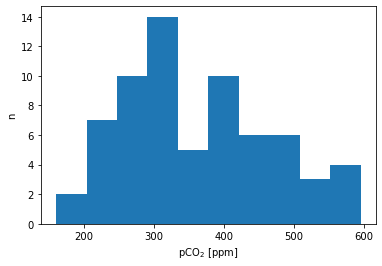

In [48]:
fig, ax = plt.subplots()

ax.hist(pCO2_all[(pCO2_all['Age_Ma']>15)&(pCO2_all['Age_Ma']<20)]['CO2_ppm'])

ax.set_xlabel('pCO$_{2}$ [ppm]')
ax.set_ylabel('n')

plt.show(fig)

## Box Plot

In [49]:
# I&NG with Sunda and Greenland
sns_df_1 = pd.DataFrame({'ppm':compiled_df['redIAsundaGL_ppm'].values,
                         'scenario':['redIAsundaGL']*n_runs})

sns_df_2 = pd.DataFrame({'ppm':compiled_df['redIAsunda10GL_ppm'].values,
                         'scenario':['redIAsunda10GL']*n_runs})

sns_df_3 = pd.DataFrame({'ppm':compiled_df['redIAsunda5GL_ppm'].values,
                         'scenario':['redIAsunda5GL']*n_runs})

# I&NG with Sunda
sns_df_4 = pd.DataFrame({'ppm':compiled_df['redIAsunda_ppm'].values,
                         'scenario':['redIAsunda']*n_runs})

sns_df_5 = pd.DataFrame({'ppm':compiled_df['redIAsunda10_ppm'].values,
                         'scenario':['redIAsunda10']*n_runs})

sns_df_6 = pd.DataFrame({'ppm':compiled_df['redIAsunda5_ppm'].values,
                         'scenario':['redIAsunda5']*n_runs})

# I&NG without Sunda
sns_df_7 = pd.DataFrame({'ppm':compiled_df['redIA_ppm'].values,
                         'scenario':['redIA']*n_runs})

sns_df_8 = pd.DataFrame({'ppm':compiled_df['redIA10_ppm'].values,
                         'scenario':['redIA10']*n_runs})

sns_df_9 = pd.DataFrame({'ppm':compiled_df['redIA5_ppm'].values,
                         'scenario':['redIA5']*n_runs})

# no I&NG
sns_df_10 = pd.DataFrame({'ppm':compiled_df['noIA_ppm'].values,
                          'scenario':['noIA']*n_runs})

# Traps
sns_df_11 = pd.DataFrame({'ppm':compiled_df['noDeccan_ppm'].values,
                          'scenario':['noDeccan']*n_runs})

sns_df_12 = pd.DataFrame({'ppm':compiled_df['noET_ppm'].values,
                          'scenario':['noET']*n_runs})

sns_df_13 = pd.DataFrame({'ppm':compiled_df['noTraps_ppm'].values,
                           'scenario':['noTraps']*n_runs})

sns_df_14 = pd.DataFrame({'ppm':compiled_df['noCRB_ppm'].values,
                           'scenario':['noCRB']*n_runs})

sns_df = pd.concat([sns_df_1,
                    sns_df_2,
                    sns_df_3,
                    sns_df_4,
                    sns_df_5,
                    sns_df_6,
                    sns_df_7,
                    sns_df_8,
                    sns_df_9,
                    sns_df_10,
                    sns_df_11,
                    sns_df_12,
                    sns_df_13,
                    sns_df_14], ignore_index=True)

sns_df_scenario_list = ['redIAsundaGL',
                        'redIAsunda10GL',
                        'redIAsunda5GL',
                        'redIAsunda',
                        'redIAsunda10',
                        'redIAsunda5',
                        'redIA',
                        'redIA10',
                        'redIA5',
                        'noIA',
                        'noDeccan',
                        'noET',
                        'noTraps',
                        'noCRB']

In [50]:
scenario_stats_name = []
scenario_stats_mean = np.array([])
scenario_stats_2sigma = np.array([])
scenario_stats_min = np.array([])
scenario_stats_max = np.array([])
scenario_stats_02_5 = np.array([])
scenario_stats_05_0 = np.array([])
scenario_stats_95_0 = np.array([])
scenario_stats_97_5 = np.array([])

for i in range(len(sns_df_scenario_list)):
    sns_df_slice = sns_df[sns_df['scenario']==sns_df_scenario_list[i]]
    
    scenario_stats_name.append(sns_df_scenario_list[i])
    scenario_stats_mean = np.append(scenario_stats_mean, np.mean(sns_df_slice['ppm']))
    scenario_stats_2sigma = np.append(scenario_stats_2sigma, 2*np.std(sns_df_slice['ppm']))
    scenario_stats_min = np.append(scenario_stats_min, np.min(sns_df_slice['ppm']))
    scenario_stats_max = np.append(scenario_stats_max, np.max(sns_df_slice['ppm']))
    scenario_stats_02_5 = np.append(scenario_stats_02_5, np.percentile(sns_df_slice['ppm'], 2.5))
    scenario_stats_05_0 = np.append(scenario_stats_05_0, np.percentile(sns_df_slice['ppm'], 5))
    scenario_stats_95_0 = np.append(scenario_stats_95_0, np.percentile(sns_df_slice['ppm'], 95))
    scenario_stats_97_5 = np.append(scenario_stats_97_5, np.percentile(sns_df_slice['ppm'], 97.5))
    
scenario_stats = pd.DataFrame({'scenario':scenario_stats_name,
                               'mean':scenario_stats_mean,
                               '2sigma':scenario_stats_2sigma,
                               'min':scenario_stats_min,
                               'max':scenario_stats_max,
                               '02_5':scenario_stats_02_5,
                               '05_0':scenario_stats_05_0,
                               '95_0':scenario_stats_95_0,
                               '97_5':scenario_stats_97_5})

scenario_stats

,scenario,mean,2sigma,min,max,02_5,05_0,95_0,97_5
0,redIAsundaGL,604.328082,78.930803,525.98520,677.70135,531.924708,539.009340,661.597520,666.884300
1,redIAsunda10GL,493.365952,28.669704,457.28778,516.30400,461.497540,466.650560,512.883380,514.129063
2,redIAsunda5GL,414.278058,19.580123,391.08350,433.99640,393.907494,396.024334,428.620360,429.659359
3,redIAsunda,612.930142,82.842559,529.17340,686.50460,536.336565,543.687240,671.065768,676.256220
4,redIAsunda10,497.589447,28.857058,460.03170,520.37024,465.607924,470.525968,517.121636,518.101885
5,redIAsunda5,417.890544,19.716969,393.44623,437.82500,396.875635,399.918406,432.434924,433.034680
6,redIA,646.058105,88.521266,553.51140,720.84240,560.110085,566.193896,702.492676,707.460430
7,redIA10,517.069612,26.057081,483.64145,536.69760,489.320102,492.274920,534.029080,535.270520
8,redIA5,436.311720,18.798057,413.67166,453.83942,417.078520,418.804680,450.143002,450.714650
9,noIA,805.154500,113.022299,669.61676,898.52600,687.749970,699.118284,874.943096,881.628452


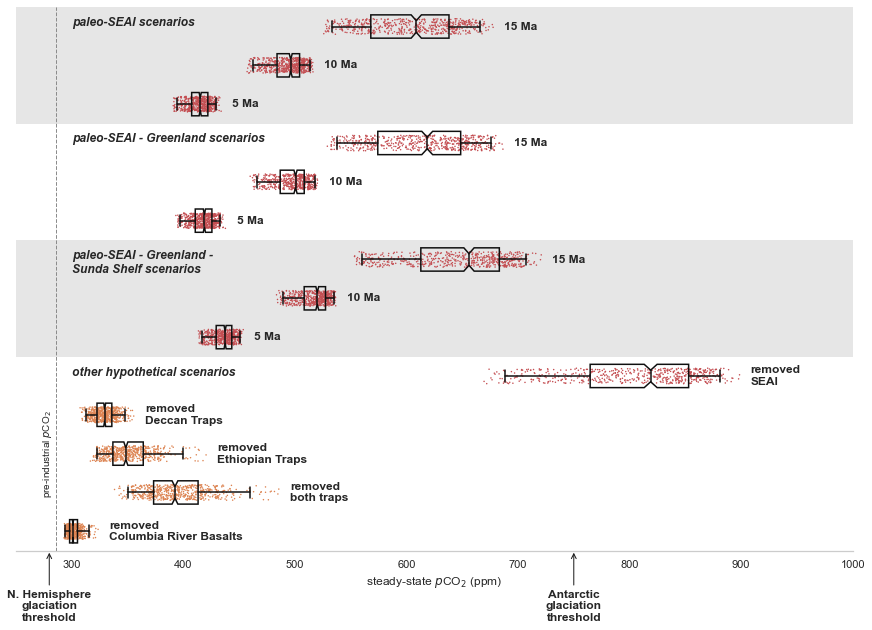

In [51]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(15,10))

# plot the data
sns.stripplot(x='ppm', y='scenario', data=sns_df, palette=['C3','C3','C3',
                                                           'C3','C3','C3',
                                                           'C3','C3','C3',
                                                           'C3','C1','C1','C1','C1'],
              dodge=True, jitter=0.2, alpha=1, size=1.5, zorder=-99)

sns.boxplot(x='ppm', y='scenario', data=sns_df, color='k',
            fliersize=0, width=0.6, notch=True, whis=(2.5,97.5), zorder=99)

for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((0,0,0,0))

# add labels for each scenario
fontsize = 12
ax.text(np.max(compiled_df['redIAsundaGL_ppm'])+10, 0,
        '15 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda10GL_ppm'])+10, 1,
        '10 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda5GL_ppm'])+10, 2,
        '5 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

ax.text(np.max(compiled_df['redIAsunda_ppm'])+10, 3,
        '15 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda10_ppm'])+10, 4,
        '10 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda5_ppm'])+10, 5,
        '5 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

ax.text(np.max(compiled_df['redIA_ppm'])+10, 6,
        '15 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIA10_ppm'])+10, 7,
        '10 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIA5_ppm'])+10, 8,
        '5 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

ax.text(np.max(compiled_df['noIA_ppm'])+10, 9,
        'removed\nSEAI', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

ax.text(np.max(compiled_df['noDeccan_ppm'])+10, 10,
        'removed\nDeccan Traps', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['noET_ppm'])+10, 11,
        'removed\nEthiopian Traps', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['noTraps_ppm'])+10, 12,
        'removed\nboth traps', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['noCRB_ppm'])+10, 13,
        'removed\nColumbia River Basalts', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

# clean up the axes
ax.set_yticklabels([])
ax.set_ylabel('')
ax.set_xlabel('steady-state $\it{p}$CO$_{2}$ (ppm)')

ax.set_xlim(250,1000)
ax.set_xticks([300,400,500,600,700,800,900,1000])

# additional labels
rect = patches.Rectangle((250,-0.5),750,3,
                         edgecolor='none',facecolor=(0.9,0.9,0.9),zorder=-999)
ax.add_patch(rect)

rect = patches.Rectangle((250,5.5),750,3,
                         edgecolor='none',facecolor=(0.9,0.9,0.9),zorder=-999)
ax.add_patch(rect)

ax.axvline(286, c='C7', lw=1, ls='--')
ax.text(284, 11, 'pre-industrial $\it{p}$CO$_{2}$', fontsize=10,
        horizontalalignment='right', verticalalignment='center', rotation=90)

ax.text(300, -0.25, 'paleo-SEAI scenarios',
        fontsize=12, style='italic', fontweight='bold',
        horizontalalignment='left', verticalalignment='top')
ax.text(300, 2.75, 'paleo-SEAI - Greenland scenarios',
        fontsize=12, style='italic', fontweight='bold',
        horizontalalignment='left', verticalalignment='top')
ax.text(300, 5.75, 'paleo-SEAI - Greenland -\nSunda Shelf scenarios',
        fontsize=12, style='italic', fontweight='bold',
        horizontalalignment='left', verticalalignment='top')
ax.text(300, 8.75, 'other hypothetical scenarios',
        fontsize=12, style='italic', fontweight='bold',
        horizontalalignment='left', verticalalignment='top')

ax.annotate("Antarctic\nglaciation\nthreshold", xy=(750, 13.5), xytext=(750, 14.5),
            arrowprops={'arrowstyle':"->", 'color':'k'},
            horizontalalignment='center', verticalalignment='top', fontweight='bold',)

ax.annotate("N. Hemisphere\nglaciation\nthreshold", xy=(280, 13.5), xytext=(280, 14.5),
            arrowprops={'arrowstyle':"->", 'color':'k'},
            horizontalalignment='center', verticalalignment='top', fontweight='bold',)

# final clean up
ax.xaxis.grid(False)
sns.despine(left=True)

#fig.savefig('../../Manuscript/Figures/scenario_pCO2_all.pdf',bbox_inches='tight')

plt.show(fig)

In [52]:
sns_df_mini = pd.concat([sns_df_1,
                         sns_df_2,
                         sns_df_3,
                         sns_df_10,
                         sns_df_11,
                         sns_df_12,
                         sns_df_13,
                         sns_df_14], ignore_index=True)

sns_df_scenario_list_mini = ['redIAsundaGL',
                             'redIAsunda10GL',
                             'redIAsunda5GL',
                             'noIA',
                             'noDeccan',
                             'noET',
                             'noTraps',
                             'noCRB']

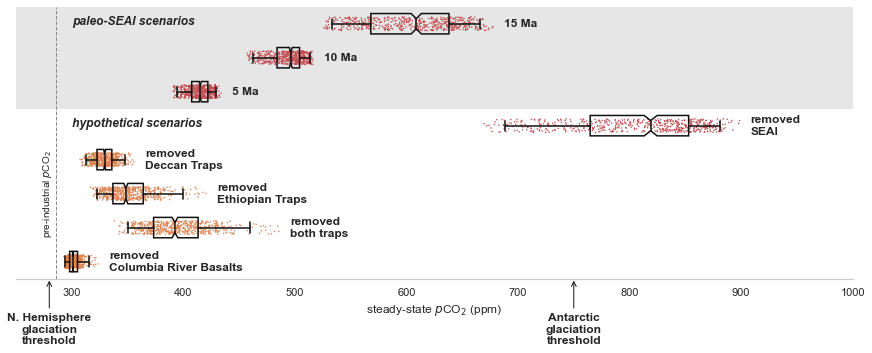

In [53]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(15,5))

# plot the data
sns.stripplot(x='ppm', y='scenario', data=sns_df_mini, palette=['C3','C3','C3','C3','C1','C1','C1','C1'],
              dodge=True, jitter=0.2, alpha=1, size=1.5, zorder=-99)

sns.boxplot(x='ppm', y='scenario', data=sns_df_mini, color='k',
            fliersize=0, width=0.6, notch=True, whis=(2.5,97.5), zorder=99)

for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((0,0,0,0))

# add labels for each scenario
fontsize = 12
ax.text(np.max(compiled_df['redIAsundaGL_ppm'])+10, 0,
        '15 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda10GL_ppm'])+10, 1,
        '10 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda5GL_ppm'])+10, 2,
        '5 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

ax.text(np.max(compiled_df['noIA_ppm'])+10, 3,
        'removed\nSEAI', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

ax.text(np.max(compiled_df['noDeccan_ppm'])+10, 4,
        'removed\nDeccan Traps', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['noET_ppm'])+10, 5,
        'removed\nEthiopian Traps', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['noTraps_ppm'])+10, 6,
        'removed\nboth traps', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['noCRB_ppm'])+10, 7,
        'removed\nColumbia River Basalts', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

# clean up the axes
ax.set_yticklabels([])
ax.set_ylabel('')
ax.set_xlabel('steady-state $\it{p}$CO$_{2}$ (ppm)')

ax.set_xlim(250,1000)
ax.set_xticks([300,400,500,600,700,800,900,1000])

# additional labels
rect = patches.Rectangle((250,-0.5),750,3,
                         edgecolor='none',facecolor=(0.9,0.9,0.9),zorder=-999)
ax.add_patch(rect)

ax.axvline(286, c='C7', lw=1, ls='--')
ax.text(284, 5, 'pre-industrial $\it{p}$CO$_{2}$', fontsize=10,
        horizontalalignment='right', verticalalignment='center', rotation=90)

ax.text(300, -0.25, 'paleo-SEAI scenarios',
        fontsize=12, style='italic', fontweight='bold',
        horizontalalignment='left', verticalalignment='top')
ax.text(300, 2.75, 'hypothetical scenarios',
        fontsize=12, style='italic', fontweight='bold',
        horizontalalignment='left', verticalalignment='top')

ax.annotate("Antarctic\nglaciation\nthreshold", xy=(750, 7.5), xytext=(750, 8.5),
            arrowprops={'arrowstyle':"->", 'color':'k'},
            horizontalalignment='center', verticalalignment='top', fontweight='bold',)

ax.annotate("N. Hemisphere\nglaciation\nthreshold", xy=(280, 7.5), xytext=(280, 8.5),
            arrowprops={'arrowstyle':"->", 'color':'k'},
            horizontalalignment='center', verticalalignment='top', fontweight='bold',)

# final clean up
ax.xaxis.grid(False)
sns.despine(left=True)

#fig.savefig('../../Manuscript/Figures/scenario_pCO2.pdf',bbox_inches='tight')

plt.show(fig)

In [54]:
sns_df_mini_mini = pd.concat([sns_df_1,
                              sns_df_2,
                              sns_df_3], ignore_index=True)

sns_df_scenario_list_mini_mini = ['redIAsundaGL',
                                  'redIAsunda10GL',
                                  'redIAsunda5GL']

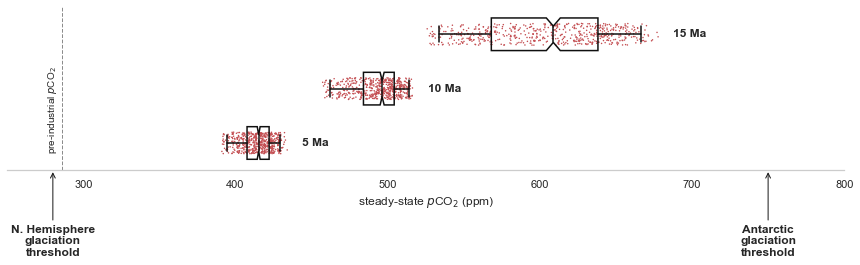

In [55]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(15,3))

# plot the data
sns.stripplot(x='ppm', y='scenario', data=sns_df_mini_mini, palette=['C3','C3','C3'],
              dodge=True, jitter=0.2, alpha=1, size=1.5, zorder=-99)

sns.boxplot(x='ppm', y='scenario', data=sns_df_mini_mini, color='k',
            fliersize=0, width=0.6, notch=True, whis=(2.5,97.5), zorder=99)

for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((0,0,0,0))

# add labels for each scenario
fontsize = 12
ax.text(np.max(compiled_df['redIAsundaGL_ppm'])+10, 0,
        '15 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda10GL_ppm'])+10, 1,
        '10 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')
ax.text(np.max(compiled_df['redIAsunda5GL_ppm'])+10, 2,
        '5 Ma', fontweight='bold', fontsize=fontsize,
        horizontalalignment='left', verticalalignment='center')

# clean up the axes
ax.set_yticklabels([])
ax.set_ylabel('')
ax.set_xlabel('steady-state $\it{p}$CO$_{2}$ (ppm)')

ax.set_xlim(250,800)
ax.set_xticks([300,400,500,600,700,800])

# additional labels

ax.axvline(286, c='C7', lw=1, ls='--')
ax.text(284, 1.4, 'pre-industrial $\it{p}$CO$_{2}$', fontsize=10,
        horizontalalignment='right', verticalalignment='center', rotation=90)

ax.annotate("Antarctic\nglaciation\nthreshold", xy=(750, 2.5), xytext=(750, 3.5),
            arrowprops={'arrowstyle':"->", 'color':'k'},
            horizontalalignment='center', verticalalignment='top', fontweight='bold',)

ax.annotate("N. Hemisphere\nglaciation\nthreshold", xy=(280, 2.5), xytext=(280, 3.5),
            arrowprops={'arrowstyle':"->", 'color':'k'},
            horizontalalignment='center', verticalalignment='top', fontweight='bold',)

# final clean up
ax.xaxis.grid(False)
sns.despine(left=True)

#fig.savefig('../../Manuscript/Figures/scenario_pCO2_mini.pdf',bbox_inches='tight')

plt.show(fig)